### Tensor Decompositions & Decoding

In [2]:
# Import packages

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


###############

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


###############

import tensorly as tl
from tensorly.decomposition import tucker,non_negative_tucker,parafac,non_negative_parafac
from tensorly import tucker_to_tensor
from tensorly.cp_tensor import cp_to_tensor

###############

In [3]:
# Import data & events structure
X=pd.read_pickle('X.pkl')
Y=pd.read_pickle('og_df_Y.pkl')

### Tensor decompositions: PARAFAC Decomposition
http://tensorly.org/stable/user_guide/tensor_decomposition.html

In [5]:
# Reshape structure into a (trial x time x channel) structure & apply algorithm 

n_components=3

X_tensor=tl.tensor(X.values.reshape(477,700,60))

factors_para = parafac(X_tensor ,rank=n_components)
print('PARAFAC output structure: ', factors_para)

PARAFAC output structure:  (weights, factors) : rank-3 CPTensor of shape (477, 700, 60) 


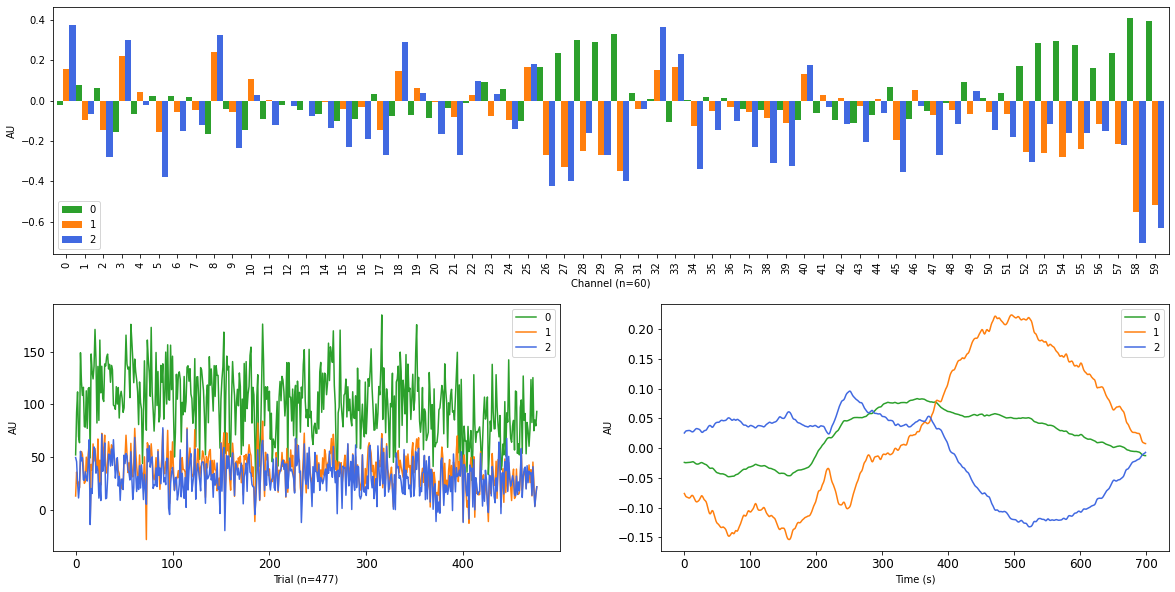

In [7]:
# Plot outputs

pd1 = pd.DataFrame(factors_para[1][0])
pd2 = pd.DataFrame(factors_para[1][1])
pd3 = pd.DataFrame(factors_para[1][2])

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(gs[0, :]) 
ax2 = fig.add_subplot(gs[1, 0]) 
ax3 = fig.add_subplot(gs[1, 1]) 


pd3.plot(ax=ax1, 
         kind='bar', 
         xlabel='Channel (n=60)', 
         ylabel='AU', 
         color=['tab:green', 'tab:orange', 'royalblue'], 
         width=1)

ax1.set_xticklabels(X.columns)


pd1.plot(ax=ax2,
         kind='line',  
         xlabel='Trial (n=477)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

pd2.plot(ax=ax3,
         kind='line',  
         xlabel='Time (s)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

plt.show();

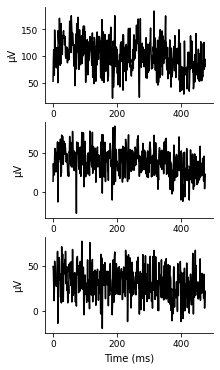

In [8]:
# Plot components across trials

%matplotlib inline

fix, ax = plt.subplots(3, 1, figsize=(3,6)) 

im = pd1[0].plot(ax=ax[0],
                 kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)

im = pd1[1].plot(ax=ax[1],
            kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)


im = pd1[2].plot(ax=ax[2],
                 kind='line',  
            xlabel='Time (ms)', 
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)


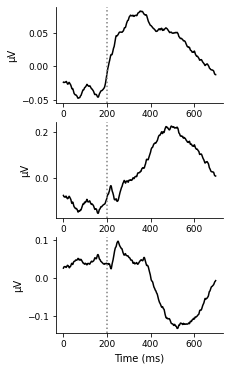

In [9]:
# Plot components across time

%matplotlib inline

fix, ax = plt.subplots(3, 1, figsize=(3,6)) 

im = pd2[0].plot(ax=ax[0],
                 kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[1].plot(ax=ax[1],
            kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[2].plot(ax=ax[2],
                 kind='line',  
            xlabel='Time (ms)', 
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

Text(-0.9997599999999984, 0.5, 'Components')

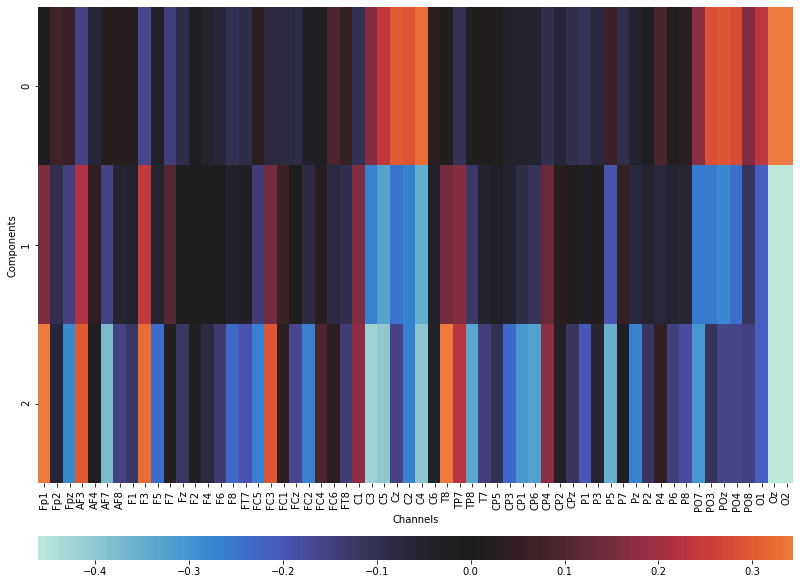

In [10]:
# Plot components across channels

%matplotlib inline

ch_names = ['Fp1', 'Fp2', 'Fpz', 'AF3',  'AF4', 'AF7', 'AF8', 'F1', 'F3', 'F5', 'F7', 'Fz', 'F2', 'F4', 'F6', 'F8', 
            'FT7', 'FC5','FC3','FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'C1', 'C3', 'C5',  'Cz', 'C2', 'C4', 'C6', 
            'T8', 'TP7', 'TP8', 'T7','CP5', 'CP3', 'CP1',  'CP6', 'CP4', 'CP2', 'CPz', 'P1', 'P3', 'P5', 'P7', 'Pz', 
            'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(11,8), constrained_layout=True)


ax = sns.heatmap(pd3.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=ch_names)

ax.set_xlabel('Channels')
ax.set_ylabel('Components')

In [11]:
# parafac_recon = tl.cp_to_tensor(factors_para)

# SSE = np.sum(np.linalg.norm((X_tensor-parafac_recon))**2)
# SST = np.sum(np.linalg.norm(X_tensor)**2)

# VAF_para = 1-SSE/SST

# print('Variance accounted for: ',VAF_para)

Variance accounted for:  0.21530528118794834


## Tensor decompositions: Non-negative-PARAFAC Decomposition

http://tensorly.org/stable/user_guide/tensor_decomposition.html

In [13]:
# Run & apply model

n_components=2

factors_nnpara = non_negative_parafac(X_tensor, rank=n_components)
print('Non-negative-PARAFAC output structure: ', factors_para)

Non-negative-PARAFAC output structure:  (weights, factors) : rank-3 CPTensor of shape (477, 700, 60) 


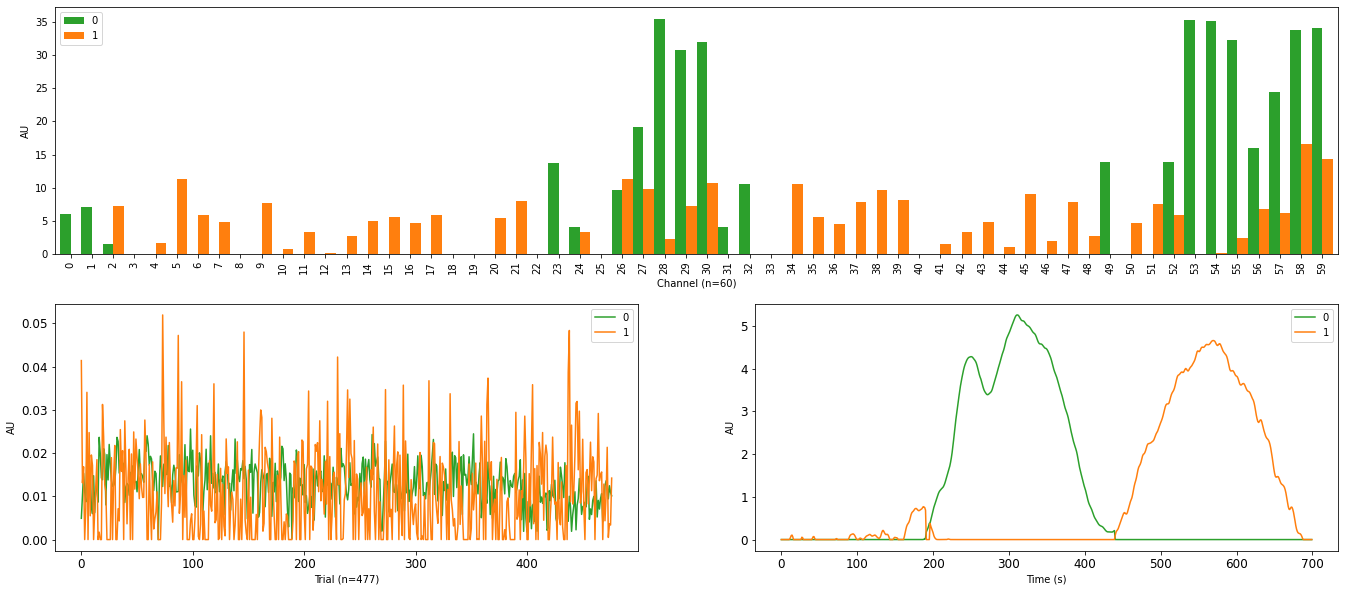

In [16]:
# Plot outputs

pd1 = pd.DataFrame(factors_nnpara[1][0])
pd2 = pd.DataFrame(factors_nnpara[1][1])
pd3 = pd.DataFrame(factors_nnpara[1][2])

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(23,10))

ax1 = fig.add_subplot(gs[0, :]) 
ax2 = fig.add_subplot(gs[1, 0]) 
ax3 = fig.add_subplot(gs[1, 1]) 


pd3.plot(ax=ax1, 
         kind='bar', 
         xlabel='Channel (n=60)', 
         ylabel='AU', 
         color=['tab:green', 'tab:orange', 'royalblue'], 
         width=1)

ax1.set_xticklabels(X.columns)


pd1.plot(ax=ax2,
         kind='line',  
         xlabel='Trial (n=477)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

pd2.plot(ax=ax3,
         kind='line',  
         xlabel='Time (s)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

plt.show();

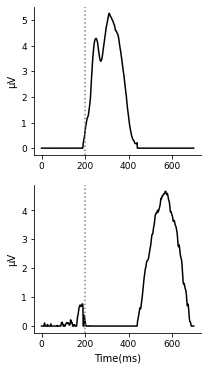

In [17]:
# Plot components across time

fix, ax = plt.subplots(2, 1, figsize=(3,6)) 

im = pd2[0].plot(ax=ax[0],
                 kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[1].plot(ax=ax[1],
            kind='line',   
            ylabel='μV', 
                 xlabel='Time(ms)',
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

# im = pd2[2].plot(ax=ax[2],
#                  kind='line',  
#             xlabel='Time (ms)', 
#             ylabel='μV', 
#             fontsize=9, 
#             color=['black'])

# im.spines['top'].set_visible(False)
# im.spines['right'].set_visible(False)
# im.axvline(x=200, linestyle='dotted', color='grey')

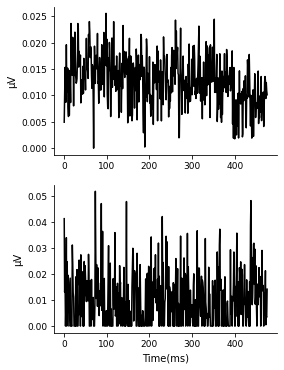

In [18]:
# Plot components across trials

%matplotlib inline

fix, ax = plt.subplots(2, 1, figsize=(4,6)) 

im = pd1[0].plot(ax=ax[0],
                 kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)

im = pd1[1].plot(ax=ax[1],
            kind='line',   
            ylabel='μV', 
                                  xlabel='Time(ms)',
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)

Text(-0.9997599999999984, 0.5, 'Components')

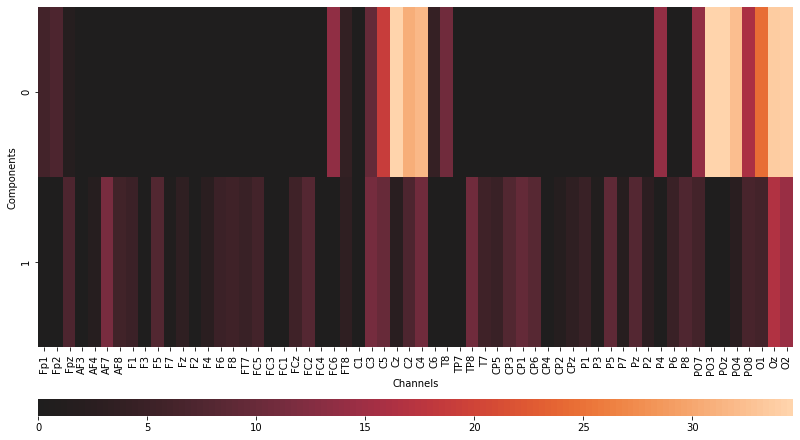

In [19]:
# Plot components across channels

ch_names = ['Fp1', 'Fp2', 'Fpz', 'AF3',  'AF4', 'AF7', 'AF8', 'F1', 'F3', 'F5', 'F7', 'Fz', 'F2', 'F4', 'F6', 'F8', 
            'FT7', 'FC5','FC3','FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'C1', 'C3', 'C5',  'Cz', 'C2', 'C4', 'C6', 
            'T8', 'TP7', 'TP8', 'T7','CP5', 'CP3', 'CP1',  'CP6', 'CP4', 'CP2', 'CPz', 'P1', 'P3', 'P5', 'P7', 'Pz', 
            'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(11,6), constrained_layout=True)


ax = sns.heatmap(pd3.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=ch_names)

ax.set_xlabel('Channels')
ax.set_ylabel('Components')

In [20]:
# nnparafac_recon = tl.cp_to_tensor(factors_nnpara)

# SSE = np.sum(np.linalg.norm((X_tensor-nnparafac_recon))**2)
# SST = np.sum(np.linalg.norm(X_tensor)**2)

# VAF_nnpara=1-SSE/SST

# print('Variance accounted for: ',VAF_nnpara)

Variance accounted for:  0.12498096644722978


## Tensor decompositions: Tucker decomposition
http://tensorly.org/stable/user_guide/tensor_decomposition.html

In [22]:
# Apply model to tensor

n_components=3

core, factors_tuck = tucker(X_tensor ,rank=[n_components,n_components,n_components])

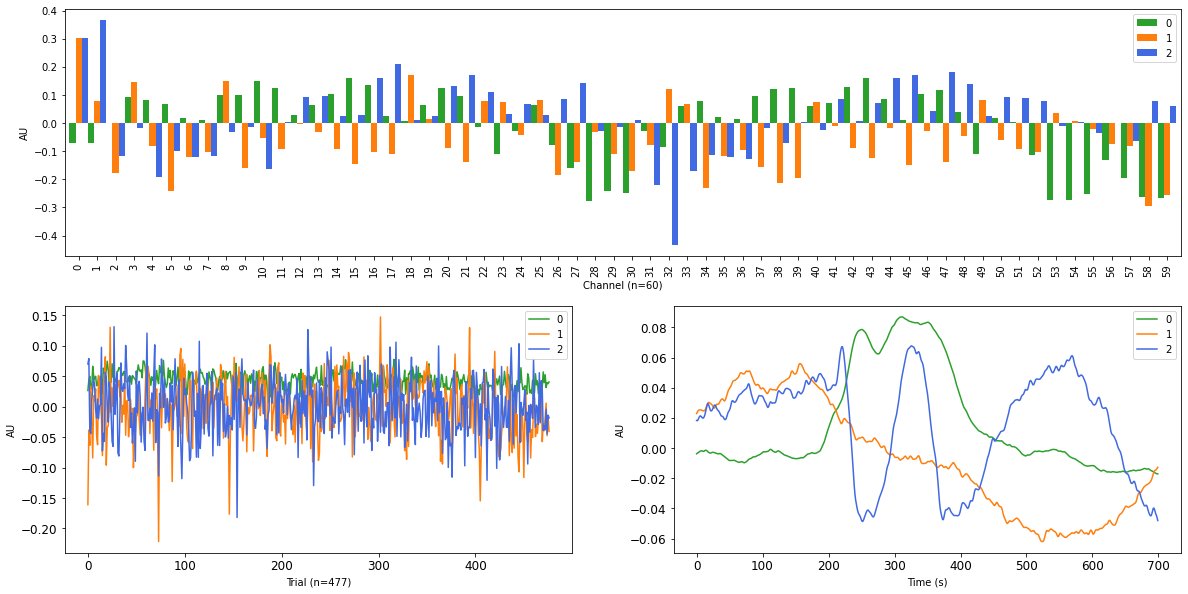

In [24]:
# Plot outputs

pd1 = pd.DataFrame(factors_tuck[0])
pd2 = pd.DataFrame(factors_tuck[1])
pd3 = pd.DataFrame(factors_tuck[2])

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(gs[0, :]) 
ax2 = fig.add_subplot(gs[1, 0]) 
ax3 = fig.add_subplot(gs[1, 1]) 


pd3.plot(ax=ax1, 
         kind='bar', 
         xlabel='Channel (n=60)', 
         ylabel='AU', 
         color=['tab:green', 'tab:orange', 'royalblue'], 
         width=1)

ax1.set_xticklabels(X.columns)


pd1.plot(ax=ax2,
         kind='line',  
         xlabel='Trial (n=477)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

pd2.plot(ax=ax3,
         kind='line',  
         xlabel='Time (s)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

plt.show();

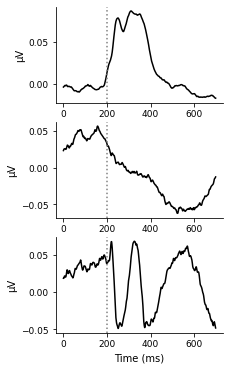

In [25]:
# Plot components across time

fix, ax = plt.subplots(3, 1, figsize=(3,6)) 

im = pd2[0].plot(ax=ax[0],
                 kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[1].plot(ax=ax[1],
            kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[2].plot(ax=ax[2],
                 kind='line',  
            xlabel='Time (ms)', 
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

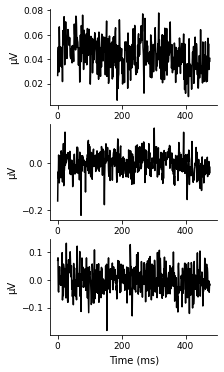

In [26]:
# Plot components across trials

fix, ax = plt.subplots(3, 1, figsize=(3,6)) 

im = pd1[0].plot(ax=ax[0],
                 kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)


im = pd1[1].plot(ax=ax[1],
            kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)


im = pd1[2].plot(ax=ax[2],
                 kind='line',  
            xlabel='Time (ms)', 
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)


Text(-0.9997599999999984, 0.5, 'Components')

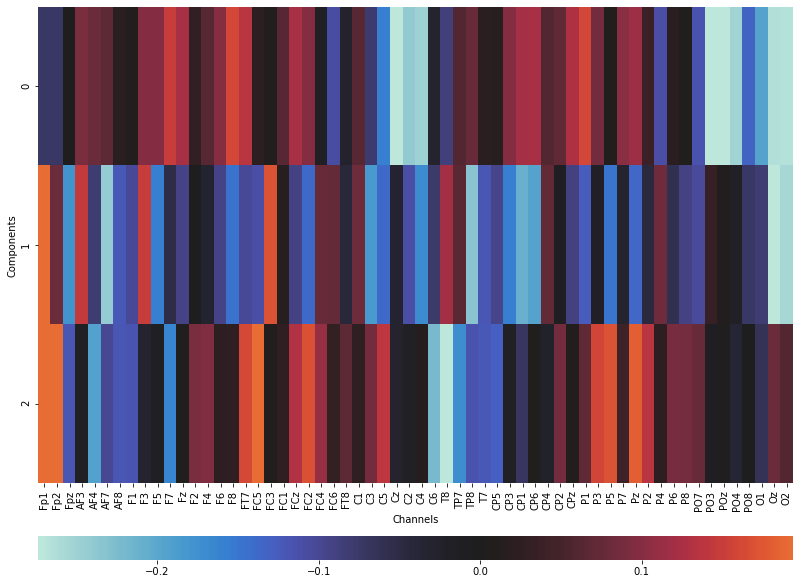

In [27]:
# Plot components across channels

ch_names = ['Fp1', 'Fp2', 'Fpz', 'AF3',  'AF4', 'AF7', 'AF8', 'F1', 'F3', 'F5', 'F7', 'Fz', 'F2', 'F4', 'F6', 'F8', 
            'FT7', 'FC5','FC3','FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'C1', 'C3', 'C5',  'Cz', 'C2', 'C4', 'C6', 
            'T8', 'TP7', 'TP8', 'T7','CP5', 'CP3', 'CP1',  'CP6', 'CP4', 'CP2', 'CPz', 'P1', 'P3', 'P5', 'P7', 'Pz', 
            'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(11,8), constrained_layout=True)


ax = sns.heatmap(pd3.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=ch_names)

ax.set_xlabel('Channels')
ax.set_ylabel('Components')

In [28]:
# tucker_recon = tucker_to_tensor([core, factors_tuck])

# SSE=np.sum(np.linalg.norm((X_tensor-tucker_recon))**2)
# SST=np.sum(np.linalg.norm(X_tensor)**2)
# VAF_tuck=1-SSE/SST

# print('Variance accounted for: ',VAF_tuck)

Variance accounted for:  0.2175857877005538


## Tensor decompositions: Non-negative Tucker
http://tensorly.org/stable/user_guide/tensor_decomposition.html

In [30]:
# Apply model

n_components=2

core, factors_nnt = non_negative_tucker(X_tensor ,rank=[n_components,n_components,n_components])

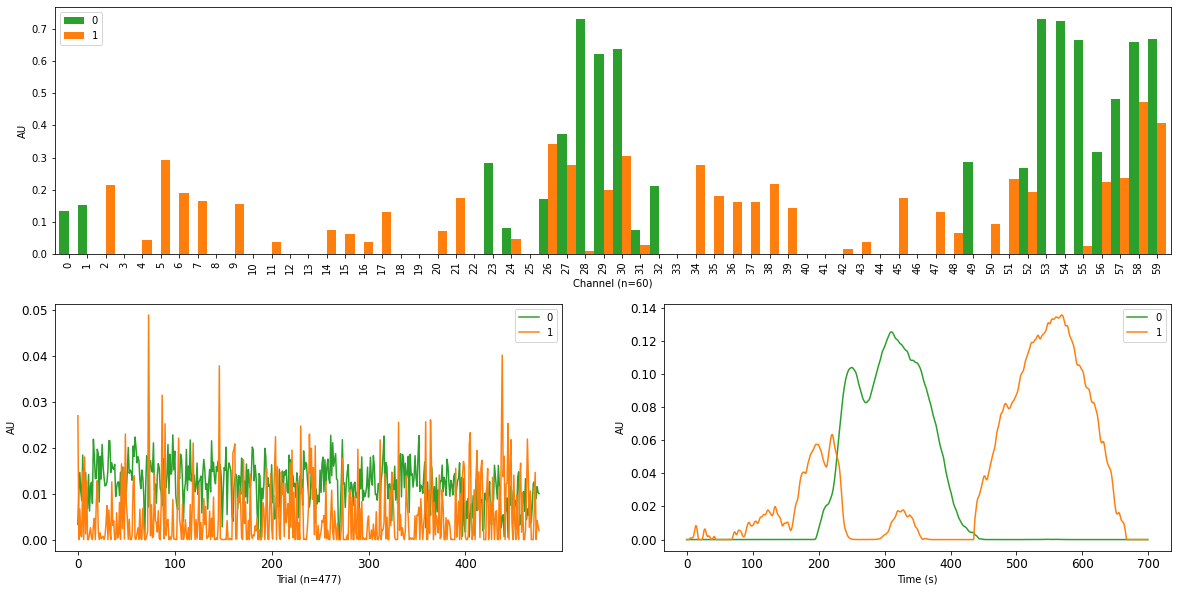

In [32]:
# Plot outputs

pd1 = pd.DataFrame(factors_nnt[0])
pd2 = pd.DataFrame(factors_nnt[1])
pd3 = pd.DataFrame(factors_nnt[2])

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(gs[0, :]) 
ax2 = fig.add_subplot(gs[1, 0]) 
ax3 = fig.add_subplot(gs[1, 1]) 


pd3.plot(ax=ax1, 
         kind='bar', 
         xlabel='Channel (n=60)', 
         ylabel='AU', 
         color=['tab:green', 'tab:orange', 'royalblue'], 
         width=1)

ax1.set_xticklabels(X.columns)


pd1.plot(ax=ax2,
         kind='line',  
         xlabel='Trial (n=477)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

pd2.plot(ax=ax3,
         kind='line',  
         xlabel='Time (s)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

plt.show();

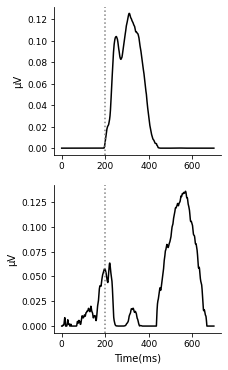

In [33]:
# Plot components across time

fix, ax = plt.subplots(2, 1, figsize=(3,6)) 

im = pd2[0].plot(ax=ax[0],
                 kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[1].plot(ax=ax[1],
            kind='line',   
            ylabel='μV', 
                 xlabel='Time(ms)',
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

# im = pd2[2].plot(ax=ax[2],
#                  kind='line',  
#             xlabel='Time (ms)', 
#             ylabel='μV', 
#             fontsize=9, 
#             color=['black'])

# im.spines['top'].set_visible(False)
# im.spines['right'].set_visible(False)
# im.axvline(x=200, linestyle='dotted', color='grey')

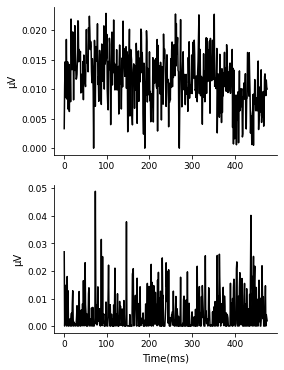

In [34]:
# Plot components across trials

%matplotlib inline

fix, ax = plt.subplots(2, 1, figsize=(4,6)) 

im = pd1[0].plot(ax=ax[0],
                 kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)

im = pd1[1].plot(ax=ax[1],
            kind='line',   
            ylabel='μV', 
                                  xlabel='Time(ms)',
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)

Text(-0.9997599999999984, 0.5, 'Components')

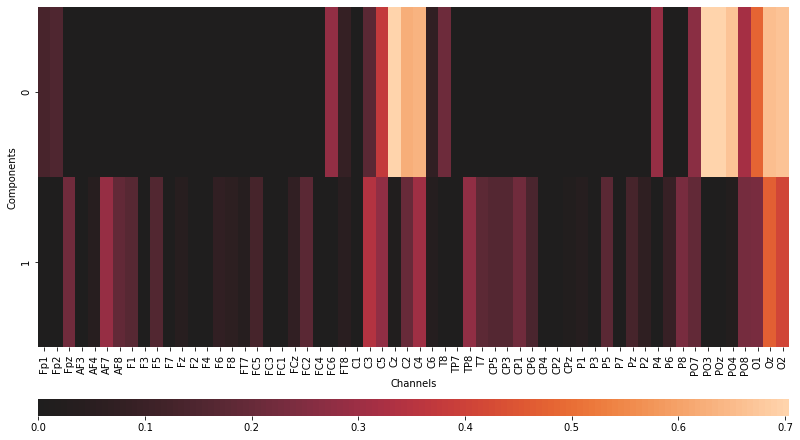

In [35]:
# Plot components across channels

%matplotlib inline

ch_names = ['Fp1', 'Fp2', 'Fpz', 'AF3',  'AF4', 'AF7', 'AF8', 'F1', 'F3', 'F5', 'F7', 'Fz', 'F2', 'F4', 'F6', 'F8', 
            'FT7', 'FC5','FC3','FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'C1', 'C3', 'C5',  'Cz', 'C2', 'C4', 'C6', 
            'T8', 'TP7', 'TP8', 'T7','CP5', 'CP3', 'CP1',  'CP6', 'CP4', 'CP2', 'CPz', 'P1', 'P3', 'P5', 'P7', 'Pz', 
            'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(11,6), constrained_layout=True)


ax = sns.heatmap(pd3.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=ch_names)

ax.set_xlabel('Channels')
ax.set_ylabel('Components')

In [36]:
# nntucker_recon = tucker_to_tensor([core, factors_nnt])

# SSE=np.sum(np.linalg.norm((X_tensor-nntucker_recon))**2)
# SST=np.sum(np.linalg.norm(X_tensor)**2)
# VAF_nntuck=1-SSE/SST

# print('Variance accounted for: ',VAF_nntuck)

Variance accounted for:  0.12061619461897732


## Task Decoding

In [37]:
# Define a function that will train & cross-validate the models capability at determining faces vs cars & plot the results

def face_car_cross_validation(factor, task):

    fig = plt.figure(figsize=(12,12), tight_layout=True)
    gs = gridspec.GridSpec(3, 2, width_ratios=[2,0.5])

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0]) 
    ax3 = fig.add_subplot(gs[2, 0]) 
    ax4 = fig.add_subplot(gs[:, 1])
    ax4.set_box_aspect(aspect=20)

    ######

    X_train, X_test, y_train, y_test = train_test_split(factor,task,train_size=0.85,stratify=task)
    class_names = 'Face', 'Car'

    # ######

    model=LDA()

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    LDA_acc_tuck=accuracy_score(y_test,y_pred)
    kfold = KFold(n_splits=50, shuffle=True)
    y_pred = cross_val_predict(model, X_test, y_test, cv=kfold)
    results = cross_val_score(model, X_test, y_test, cv=kfold)
    conf = confusion_matrix(y_test,y_pred)

    group_names = ['True',
                   'False',
                   'False',
                   'True']

    group_counts = ["{0:0.0f}".format(value) for value in conf.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in conf.flatten()/np.sum(conf)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(conf, 
                ax=ax1, 
                cbar=False, 
                yticklabels=class_names, 
                xticklabels=class_names, 
                cmap='YlGnBu',
                square=True,
                annot=labels, 
                fmt='')

    ax1.set_title('Linear discriminant analysis (LDA)')

    print('Single iteration LDA Accuracy score: ', LDA_acc_tuck)
    print("Cross validated score (Mean (Std)): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    print(sum_stats(conf))

    # ######

    model=GaussianNB()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    GNB_acc_tuck = accuracy_score(y_test,y_pred)
    kfold = KFold(n_splits=50, shuffle=True)
    y_pred = cross_val_predict(model, X_test, y_test, cv=kfold)
    results = cross_val_score(model, X_test, y_test, cv=kfold)
    conf = confusion_matrix(y_test,y_pred)

    group_names = ['True',
                   'False',
                   'False',
                   'True']

    group_counts = ["{0:0.0f}".format(value) for value in conf.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in conf.flatten()/np.sum(conf)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(conf,
                ax=ax2, 
                cbar=False, 
                yticklabels=class_names, 
                xticklabels=class_names, 
                cmap='YlGnBu', 
                square=True,
                annot=labels, 
                fmt='')

    ax2.set_title('Gaussian Naive Bayes')

    print('Single iteration Gaussian Naive Bayes Accuracy score: ', GNB_acc_tuck)
    print("Cross validated score (Mean (Std)): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    print(sum_stats(conf))

    # ######

    model = KNN()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    KNN_acc_tuck = accuracy_score(y_test,y_pred)

    kfold = KFold(n_splits=50, shuffle=True)
    y_pred = cross_val_predict(model, X_test, y_test, cv=kfold)
    results = cross_val_score(model, X_test, y_test, cv=kfold)
    conf = confusion_matrix(y_test,y_pred)

    group_names = ['True',
                   'False',
                   'False',
                   'True']

    group_counts = ["{0:0.0f}".format(value) for value in conf.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in conf.flatten()/np.sum(conf)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(conf,
                ax=ax3, 
                cbar=True,
                cbar_ax=ax4, 
                yticklabels=class_names, 
                xticklabels=class_names, 
                cmap='YlGnBu',
                square=True,
                annot=labels, 
                fmt='')

    ax3.set_title('K-nearest neighbors')

    print('Single iteration K-nearest neighbors Accuracy score: ', KNN_acc_tuck)
    print("Cross validated score (Mean (Std)): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    print(sum_stats(conf))

    ax1.set_ylabel('True label'); 
    ax2.set_ylabel('True label'); 
    ax3.set_ylabel('True label');

    ax1.set_xlabel('Predicted label');
    ax2.set_xlabel('Predicted label'); 
    ax3.set_xlabel('Predicted label');

    plt.show()

In [38]:
# Define a function that will train & cross-validate the models capability at determining coherence of stimulus presented & plot the results

def difficulty_cross_validation(factor, task):

    fig = plt.figure(figsize=(12,12), tight_layout=True)
    gs = gridspec.GridSpec(3, 2, width_ratios=[2,0.5])

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0]) 
    ax3 = fig.add_subplot(gs[2, 0]) 
    ax4 = fig.add_subplot(gs[:, 1])
    ax4.set_box_aspect(aspect=20)

    ######

    X_train, X_test, y_train, y_test = train_test_split(factor,task,train_size=0.85,stratify=task)
    class_names = '1', '2', '3', '4', '5', '6'

    # ######

    model=LDA()

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    LDA_acc_tuck=accuracy_score(y_test,y_pred)
    kfold = KFold(n_splits=50, shuffle=True)
    y_pred = cross_val_predict(model, X_test, y_test, cv=kfold)
    results = cross_val_score(model, X_test, y_test, cv=kfold)
    conf = confusion_matrix(y_test,y_pred)

    sns.heatmap(conf, 
                ax=ax1, 
                cbar=False, 
                yticklabels=class_names, 
                xticklabels=class_names, 
                cmap='YlGnBu',
                square=True,
                annot=True)

    ax1.set_title('Linear discriminant analysis (LDA)')

    x=1/6
    print('Significance above', "%.2f" % x)

    print('Single iteration LDA Accuracy score: ', "%.2f" % LDA_acc_tuck)
    print("Cross validated score (Mean (Std)): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

    # ######

    model=GaussianNB()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    GNB_acc_tuck = accuracy_score(y_test,y_pred)
    kfold = KFold(n_splits=50, shuffle=True)
    y_pred = cross_val_predict(model, X_test, y_test, cv=kfold)
    results = cross_val_score(model, X_test, y_test, cv=kfold)
    conf = confusion_matrix(y_test,y_pred)

    sns.heatmap(conf,
                ax=ax2, 
                cbar=False, 
                yticklabels=class_names, 
                xticklabels=class_names, 
                cmap='YlGnBu', 
                square=True,
                annot=True)

    ax2.set_title('Gaussian Naive Bayes')

    print('Single iteration Gaussian Naive Bayes Accuracy score: ' , "%.2f" % GNB_acc_tuck)
    print("Cross validated score (Mean (Std)): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

    # ######

    model = KNN()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    KNN_acc_tuck = accuracy_score(y_test,y_pred)

    kfold = KFold(n_splits=50, shuffle=True)
    y_pred = cross_val_predict(model, X_test, y_test, cv=kfold)
    results = cross_val_score(model, X_test, y_test, cv=kfold)
    conf = confusion_matrix(y_test,y_pred)

    sns.heatmap(conf,
                ax=ax3, 
                cbar=True,
                cbar_ax=ax4, 
                yticklabels=class_names, 
                xticklabels=class_names, 
                cmap='YlGnBu',
                square=True,
                annot=True)

    ax3.set_title('K-nearest neighbors')

    print('Single iteration K-nearest neighbors Accuracy score: ', "%.2f" % KNN_acc_tuck)
    print("Cross validated score (Mean (Std)): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

    ax1.set_ylabel('True label'); 
    ax2.set_ylabel('True label'); 
    ax3.set_ylabel('True label');

    ax1.set_xlabel('Predicted label');
    ax2.set_xlabel('Predicted label'); 
    ax3.set_xlabel('Predicted label');

    plt.show()

In [39]:
# Define a function that will print the summary statistics

def sum_stats(conf):
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(conf) / float(np.sum(conf))
        precision = conf[1,1] / sum(conf[:,1])
        recall    = conf[1,1] / sum(conf[1,:])
        f1_score  = 2*precision*recall / (precision + recall)
        print('accuracy:', "%.2f" % accuracy, 
              'precision:', "%.2f" % precision,
              'recall:', "%.2f" % recall,
              'f1_score:', "%.2f" % f1_score)

### Decode the tasks using each algorithm + LDA, NBA & KNN classifiers

In [40]:
para = factors_para[1][0]
nnpara = factors_nnpara[1][0]
tuck = factors_tuck[0]
nntuck = factors_nnt[0]

facecar = Y.iloc[:,0]
coherence = Y.iloc[:,1]

In [55]:
%matplotlib

face_car_cross_validation(factor=para, task=facecar)

print("#####")

difficulty_cross_validation(factor=para, task=coherence)

Using matplotlib backend: MacOSX
Single iteration LDA Accuracy score:  0.6388888888888888
Cross validated score (Mean (Std)): 60.00% (42.43%)
accuracy: 0.61 precision: 0.62 recall: 0.58 f1_score: 0.60
None
Single iteration Gaussian Naive Bayes Accuracy score:  0.6527777777777778
Cross validated score (Mean (Std)): 66.00% (42.94%)
accuracy: 0.67 precision: 0.69 recall: 0.61 f1_score: 0.65
None
Single iteration K-nearest neighbors Accuracy score:  0.5277777777777778
Cross validated score (Mean (Std)): 64.00% (41.28%)
accuracy: 0.60 precision: 0.60 recall: 0.58 f1_score: 0.59
None
#####
Significance above 0.17
Single iteration LDA Accuracy score:  0.18
Cross validated score (Mean (Std)): 14.00% (30.07%)
Single iteration Gaussian Naive Bayes Accuracy score:  0.18
Cross validated score (Mean (Std)): 15.00% (28.72%)
Single iteration K-nearest neighbors Accuracy score:  0.18
Cross validated score (Mean (Std)): 13.00% (29.68%)


In [65]:
face_car_cross_validation(factor=nnpara, task=facecar)
difficulty_cross_validation(factor=nnpara, task=coherence)

Single iteration LDA Accuracy score:  0.7222222222222222
Cross validated score (Mean (Std)): 65.00% (41.53%)
accuracy: 0.68 precision: 0.70 recall: 0.64 f1_score: 0.67
None
Single iteration Gaussian Naive Bayes Accuracy score:  0.6666666666666666
Cross validated score (Mean (Std)): 64.00% (42.47%)
accuracy: 0.64 precision: 0.68 recall: 0.53 f1_score: 0.59
None
Single iteration K-nearest neighbors Accuracy score:  0.5277777777777778
Cross validated score (Mean (Std)): 60.00% (41.23%)
accuracy: 0.60 precision: 0.62 recall: 0.50 f1_score: 0.55
None
Significance above 0.17
Single iteration LDA Accuracy score:  0.28
Cross validated score (Mean (Std)): 21.00% (36.18%)
Single iteration Gaussian Naive Bayes Accuracy score:  0.28
Cross validated score (Mean (Std)): 26.00% (36.39%)
Single iteration K-nearest neighbors Accuracy score:  0.26
Cross validated score (Mean (Std)): 24.00% (37.74%)


In [66]:
face_car_cross_validation(factor=tuck, task=facecar)
difficulty_cross_validation(factor=tuck, task=coherence)

Single iteration LDA Accuracy score:  0.6666666666666666
Cross validated score (Mean (Std)): 59.00% (42.06%)
accuracy: 0.57 precision: 0.56 recall: 0.61 f1_score: 0.59
None
Single iteration Gaussian Naive Bayes Accuracy score:  0.6527777777777778
Cross validated score (Mean (Std)): 56.00% (45.43%)
accuracy: 0.61 precision: 0.61 recall: 0.61 f1_score: 0.61
None
Single iteration K-nearest neighbors Accuracy score:  0.5
Cross validated score (Mean (Std)): 45.00% (45.00%)
accuracy: 0.43 precision: 0.42 recall: 0.39 f1_score: 0.41
None
Significance above 0.17
Single iteration LDA Accuracy score:  0.19
Cross validated score (Mean (Std)): 24.00% (39.04%)
Single iteration Gaussian Naive Bayes Accuracy score:  0.18
Cross validated score (Mean (Std)): 24.00% (37.74%)
Single iteration K-nearest neighbors Accuracy score:  0.18
Cross validated score (Mean (Std)): 20.00% (33.17%)


In [75]:
face_car_cross_validation(factor=nntuck, task=facecar)
difficulty_cross_validation(factor=nntuck, task=coherence)

Single iteration LDA Accuracy score:  0.6527777777777778
Cross validated score (Mean (Std)): 59.00% (45.49%)
accuracy: 0.61 precision: 0.60 recall: 0.67 f1_score: 0.63
None
Single iteration Gaussian Naive Bayes Accuracy score:  0.6805555555555556
Cross validated score (Mean (Std)): 55.00% (42.72%)
accuracy: 0.57 precision: 0.57 recall: 0.56 f1_score: 0.56
None
Single iteration K-nearest neighbors Accuracy score:  0.5555555555555556
Cross validated score (Mean (Std)): 46.00% (42.24%)
accuracy: 0.49 precision: 0.49 recall: 0.47 f1_score: 0.48
None
Significance above 0.17
Single iteration LDA Accuracy score:  0.18
Cross validated score (Mean (Std)): 7.00% (20.02%)
Single iteration Gaussian Naive Bayes Accuracy score:  0.22
Cross validated score (Mean (Std)): 19.00% (34.48%)
Single iteration K-nearest neighbors Accuracy score:  0.11
Cross validated score (Mean (Std)): 18.00% (34.29%)


### Produce single-iteration accuracy scores 

In [84]:
ranks=[1, 2, 3, 4, 5, 6]

model1=LDA()
model2=GaussianNB()
model3=KNN()

models={model1,model2,model3}

In [87]:
### Single Iteration

task=facecar

Tucker_performance_facecar_LDA=[]
NNTucker_performance_facecar_LDA=[]
PARAFAC_performance_facecar_LDA=[]
NNPARAFAC_performance_facecar_LDA=[]

Tucker_performance_facecar_GNB=[]
NNTucker_performance_facecar_GNB=[]
PARAFAC_performance_facecar_GNB=[]
NNPARAFAC_performance_facecar_GNB=[]

Tucker_performance_facecar_KNN=[]
NNTucker_performance_facecar_KNN=[]
PARAFAC_performance_facecar_KNN=[]
NNPARAFAC_performance_facecar_KNN=[]

for i in ranks:
    core, factors_tuck = tucker(X_tensor ,rank=[i,i,i])
    core, factors_nnt = non_negative_tucker(X_tensor ,rank=[i,i,i])
    factors_nnpara = non_negative_parafac(X_tensor ,rank=i)
    factors_para = parafac(X_tensor ,rank=i)
    
    for model in models:
        
        X_train, X_test, y_train, y_test=train_test_split(factors_tuck[0],task,train_size=0.85,stratify=task)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        if model==model1:
            Tucker_performance_facecar_LDA.append(accuracy_score(y_test,y_pred))
        elif model==model2:
            Tucker_performance_facecar_GNB.append(accuracy_score(y_test,y_pred))
        elif model==model3:
            Tucker_performance_facecar_KNN.append(accuracy_score(y_test,y_pred))
        
        X_train, X_test, y_train, y_test=train_test_split(factors_nnt[0],task,train_size=0.85,stratify=task)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
                
        if model==model1:
            NNTucker_performance_facecar_LDA.append(accuracy_score(y_test,y_pred))
        elif model==model2:
            NNTucker_performance_facecar_GNB.append(accuracy_score(y_test,y_pred))
        elif model==model3:
            NNTucker_performance_facecar_KNN.append(accuracy_score(y_test,y_pred))
        

        X_train, X_test, y_train, y_test=train_test_split(factors_para[1][0],task,train_size=0.85,stratify=task)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        if model==model1:     
            PARAFAC_performance_facecar_LDA.append(accuracy_score(y_test,y_pred))
        if model==model2:
            PARAFAC_performance_facecar_GNB.append(accuracy_score(y_test,y_pred))
        if model==model3:
            PARAFAC_performance_facecar_KNN.append(accuracy_score(y_test,y_pred))

        X_train, X_test, y_train, y_test=train_test_split(factors_nnpara[1][0],task,train_size=0.85,stratify=task)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        if model==model1:     
            NNPARAFAC_performance_facecar_LDA.append(accuracy_score(y_test,y_pred))
        if model==model2:
            NNPARAFAC_performance_facecar_GNB.append(accuracy_score(y_test,y_pred))
        if model==model3:
            NNPARAFAC_performance_facecar_KNN.append(accuracy_score(y_test,y_pred))

### Produce cross-validated accuracy scores 

In [126]:
### Cross-Validated Scores

task=facecar

X_Tucker_performance_facecar_LDA=[]
X_NNTucker_performance_facecar_LDA=[]
X_PARAFAC_performance_facecar_LDA=[]
X_NNPARAFAC_performance_facecar_LDA=[]

X_Tucker_performance_facecar_GNB=[]
X_NNTucker_performance_facecar_GNB=[]
X_PARAFAC_performance_facecar_GNB=[]
X_NNPARAFAC_performance_facecar_GNB=[]

X_Tucker_performance_facecar_KNN=[]
X_NNTucker_performance_facecar_KNN=[]
X_PARAFAC_performance_facecar_KNN=[]
X_NNPARAFAC_performance_facecar_KNN=[]

for i in ranks:
    core, factors_tuck = tucker(X_tensor ,rank=[i,i,i])
    core, factors_nnt = non_negative_tucker(X_tensor ,rank=[i,i,i])
    factors_nnpara = non_negative_parafac(X_tensor ,rank=i)
    factors_para = parafac(X_tensor ,rank=i)
    
    for model in models:
        
        X_train, X_test, y_train, y_test=train_test_split(factors_tuck[0],task,train_size=0.85,stratify=task)
        kfold = KFold(n_splits=50, shuffle=True)
        results = cross_val_score(model, X_test, y_test, cv=kfold)
        
        if model==model1:
            X_Tucker_performance_facecar_LDA.append(results.mean())
            X_Tucker_performance_facecar_LDA.append(results.std())
        elif model==model2:
            X_Tucker_performance_facecar_GNB.append(results.mean())
            X_Tucker_performance_facecar_GNB.append(results.std())
        elif model==model3:
            X_Tucker_performance_facecar_KNN.append(results.mean())
            X_Tucker_performance_facecar_KNN.append(results.std())
        
        X_train, X_test, y_train, y_test=train_test_split(factors_nnt[0],task,train_size=0.85,stratify=task)
        kfold = KFold(n_splits=50, shuffle=True)
        results = cross_val_score(model, X_test, y_test, cv=kfold)
                
        if model==model1:
            X_NNTucker_performance_facecar_LDA.append(results.mean())
            X_NNTucker_performance_facecar_LDA.append(results.std())
        elif model==model2:
            X_NNTucker_performance_facecar_GNB.append(results.mean())
            X_NNTucker_performance_facecar_GNB.append(results.std())
        elif model==model3:
            X_NNTucker_performance_facecar_KNN.append(results.mean())
            X_NNTucker_performance_facecar_KNN.append(results.std())

        X_train, X_test, y_train, y_test=train_test_split(factors_para[1][0],task,train_size=0.85,stratify=task)
        kfold = KFold(n_splits=50, shuffle=True)
        results = cross_val_score(model, X_test, y_test, cv=kfold)
        
        if model==model1:     
            X_PARAFAC_performance_facecar_LDA.append(results.mean())
            X_PARAFAC_performance_facecar_LDA.append(results.std())
        if model==model2:
            X_PARAFAC_performance_facecar_GNB.append(results.mean())
            X_PARAFAC_performance_facecar_GNB.append(results.std())
        if model==model3:
            X_PARAFAC_performance_facecar_KNN.append(results.mean())
            X_PARAFAC_performance_facecar_KNN.append(results.std())

        X_train, X_test, y_train, y_test=train_test_split(factors_nnpara[1][0],task,train_size=0.85,stratify=task)
        kfold = KFold(n_splits=50, shuffle=True)
        results = cross_val_score(model, X_test, y_test, cv=kfold)
        
        if model==model1:     
            X_NNPARAFAC_performance_facecar_LDA.append(results.mean())
            X_NNPARAFAC_performance_facecar_LDA.append(results.std())
        if model==model2:
            X_NNPARAFAC_performance_facecar_GNB.append(results.mean())
            X_NNPARAFAC_performance_facecar_GNB.append(results.std())
        if model==model3:
            X_NNPARAFAC_performance_facecar_KNN.append(results.mean())
            X_NNPARAFAC_performance_facecar_KNN.append(results.std())

In [127]:
print(*X_PARAFAC_performance_facecar_LDA, sep='  ')

0.42  0.44  0.53  0.4517742799230607  0.64  0.4127953488110059  0.63  0.44508426168535775  0.58  0.40447496832313373  0.44  0.44317039612320674


In [128]:
print(*X_PARAFAC_performance_facecar_GNB, sep='  ')

0.58  0.44  0.72  0.3762977544445356  0.62  0.4308131845707603  0.55  0.45  0.54  0.42237424163885756  0.65  0.4272001872658766


In [129]:
print(X_PARAFAC_performance_facecar_KNN, sep=' ')

[0.49, 0.41821047332652966, 0.43, 0.4473253849269009, 0.62, 0.4190465367951392, 0.42, 0.44, 0.61, 0.45044422518220834, 0.61, 0.40360872141221127]


In [130]:
print(X_NNPARAFAC_performance_facecar_LDA, sep=' ')

[0.67, 0.4313930922024598, 0.43, 0.4473253849269009, 0.68, 0.4093897898091744, 0.58, 0.44, 0.51, 0.4414748010928823, 0.48, 0.4467661580737735]


In [131]:
print(X_NNPARAFAC_performance_facecar_GNB, sep=' ')

[0.61, 0.4276680956068619, 0.52, 0.4467661580737735, 0.56, 0.4651881339845203, 0.59, 0.43231932642434573, 0.56, 0.431740662898458, 0.54, 0.45650848842053315]


In [132]:
print(X_NNPARAFAC_performance_facecar_KNN, sep=' ')

[0.71, 0.40112342240263166, 0.34, 0.39293765408777, 0.56, 0.431740662898458, 0.64, 0.424735211631906, 0.49, 0.4414748010928823, 0.59, 0.4205948168962619]


In [133]:
print(X_Tucker_performance_facecar_LDA, sep=' ')

[0.48, 0.4467661580737735, 0.57, 0.4124318125460256, 0.59, 0.44373415464667587, 0.57, 0.4243819034784589, 0.52, 0.43543082114154485, 0.61, 0.45044422518220834]


In [134]:
print(X_Tucker_performance_facecar_GNB, sep=' ')

[0.52, 0.4467661580737735, 0.64, 0.424735211631906, 0.55, 0.4387482193696061, 0.48, 0.4467661580737735, 0.6, 0.4242640687119285, 0.63, 0.4220189569201839]


In [135]:
print(X_Tucker_performance_facecar_KNN, sep=' ')

[0.45, 0.45000000000000007, 0.62, 0.41904653679513926, 0.42, 0.428485705712571, 0.59, 0.4205948168962619, 0.58, 0.44, 0.5, 0.458257569495584]


In [136]:
print(X_NNTucker_performance_facecar_LDA, sep=' ')

[0.53, 0.4290687590584987, 0.66, 0.42941821107167777, 0.61, 0.439203825119955, 0.62, 0.40693979898751614, 0.53, 0.46270941205037097, 0.6, 0.41231056256176607]


In [137]:
print(X_NNTucker_performance_facecar_GNB, sep=' ')

[0.57, 0.4473253849269009, 0.59, 0.43231932642434573, 0.56, 0.4317406628984581, 0.52, 0.4354308211415448, 0.45, 0.4272001872658766, 0.61, 0.4158124577258358]


In [138]:
print(X_NNTucker_performance_facecar_KNN, sep=' ')

[0.58, 0.4166533331199932, 0.62, 0.4308131845707603, 0.6, 0.4472135954999579, 0.56, 0.42, 0.53, 0.45177427992306074, 0.52, 0.43543082114154485]


### Same as above but for coherence

In [139]:
task = coherence

Tucker_performance_diff_LDA=[]
NNTucker_performance_diff_LDA=[]
PARAFAC_performance_diff_LDA=[]
NNPARAFAC_performance_diff_LDA=[]

Tucker_performance_diff_GNB=[]
NNTucker_performance_diff_GNB=[]
PARAFAC_performance_diff_GNB=[]
NNPARAFAC_performance_diff_GNB=[]

Tucker_performance_diff_KNN=[]
NNTucker_performance_diff_KNN=[]
PARAFAC_performance_diff_KNN=[]
NNPARAFAC_performance_diff_KNN=[]

for i in ranks:
    core, factors_tuck = tucker(X_tensor ,rank=[i,i,i])
    core, factors_nnt =non_negative_tucker(X_tensor ,rank=[i,i,i])
    factors_nnpara = non_negative_parafac(X_tensor ,rank=i)
    factors_para = parafac(X_tensor ,rank=i)
    
    for model in models:
        
        X_train, X_test, y_train, y_test=train_test_split(factors_tuck[0],task,train_size=0.85,stratify=task)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)

        
        if model==model1:
            Tucker_performance_diff_LDA.append(accuracy_score(y_test,y_pred))
        elif model==model2:
            Tucker_performance_diff_GNB.append(accuracy_score(y_test,y_pred))
        elif model==model3:
            Tucker_performance_diff_KNN.append(accuracy_score(y_test,y_pred))


        X_train, X_test, y_train, y_test=train_test_split(factors_nnt[0],task,train_size=0.85,stratify=task)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)

        
        if model==model1:
            NNTucker_performance_diff_LDA.append(accuracy_score(y_test,y_pred))
        elif model==model2:
            NNTucker_performance_diff_GNB.append(accuracy_score(y_test,y_pred))
        elif model==model3:
            NNTucker_performance_diff_KNN.append(accuracy_score(y_test,y_pred))
        
        X_train, X_test, y_train, y_test=train_test_split(factors_para[1][0],task,train_size=0.85,stratify=task)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
       
        
        if model==model1:     
            PARAFAC_performance_diff_LDA.append(accuracy_score(y_test,y_pred))
        if model==model2:
            PARAFAC_performance_diff_GNB.append(accuracy_score(y_test,y_pred))
        if model==model3:
            PARAFAC_performance_diff_KNN.append(accuracy_score(y_test,y_pred))

        X_train, X_test, y_train, y_test=train_test_split(factors_nnpara[1][0],task,train_size=0.85,stratify=task)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)

                        
        if model==model1:     
            NNPARAFAC_performance_diff_LDA.append(accuracy_score(y_test,y_pred))
        if model==model2:
            NNPARAFAC_performance_diff_GNB.append(accuracy_score(y_test,y_pred))
        if model==model3:
            NNPARAFAC_performance_diff_KNN.append(accuracy_score(y_test,y_pred))

In [140]:
print(*PARAFAC_performance_diff_LDA, sep=' ')

0.2361111111111111 0.2361111111111111 0.2361111111111111 0.19444444444444445 0.19444444444444445 0.2777777777777778


In [141]:
print(*PARAFAC_performance_diff_GNB,sep=' ')

0.20833333333333334 0.20833333333333334 0.18055555555555555 0.19444444444444445 0.2638888888888889 0.2361111111111111


In [142]:
print(*PARAFAC_performance_diff_KNN,sep=' ')

0.20833333333333334 0.20833333333333334 0.2361111111111111 0.2222222222222222 0.16666666666666666 0.1527777777777778


In [143]:
print(*NNPARAFAC_performance_diff_LDA,sep=' ')

0.18055555555555555 0.3333333333333333 0.19444444444444445 0.125 0.19444444444444445 0.2361111111111111


In [144]:
print(*NNPARAFAC_performance_diff_GNB,sep=' ')

0.1388888888888889 0.16666666666666666 0.16666666666666666 0.2361111111111111 0.1527777777777778 0.2638888888888889


In [145]:
print(*NNPARAFAC_performance_diff_KNN,sep=' ')

0.19444444444444445 0.20833333333333334 0.19444444444444445 0.18055555555555555 0.18055555555555555 0.16666666666666666


In [146]:
print(*Tucker_performance_diff_LDA,sep=' ')

0.1388888888888889 0.16666666666666666 0.09722222222222222 0.20833333333333334 0.2222222222222222 0.3333333333333333


In [147]:
print(*Tucker_performance_diff_GNB,sep=' ')

0.125 0.2222222222222222 0.2916666666666667 0.3194444444444444 0.19444444444444445 0.3194444444444444


In [148]:
print(*Tucker_performance_diff_KNN, sep=' ')

0.2222222222222222 0.16666666666666666 0.19444444444444445 0.2222222222222222 0.2222222222222222 0.25


In [149]:
print(*NNTucker_performance_diff_LDA,sep=' ')

0.25 0.2916666666666667 0.18055555555555555 0.3055555555555556 0.2222222222222222 0.1527777777777778


In [150]:
print(*NNTucker_performance_diff_GNB,sep=' ')

0.2361111111111111 0.2222222222222222 0.2361111111111111 0.2361111111111111 0.19444444444444445 0.2222222222222222


In [151]:
print(*NNTucker_performance_diff_KNN,sep=' ')

0.16666666666666666 0.16666666666666666 0.18055555555555555 0.2222222222222222 0.16666666666666666 0.18055555555555555


In [152]:
task = coherence

X_Tucker_performance_diff_LDA=[]
X_NNTucker_performance_diff_LDA=[]
X_PARAFAC_performance_diff_LDA=[]
X_NNPARAFAC_performance_diff_LDA=[]

X_Tucker_performance_diff_GNB=[]
X_NNTucker_performance_diff_GNB=[]
X_PARAFAC_performance_diff_GNB=[]
X_NNPARAFAC_performance_diff_GNB=[]

X_Tucker_performance_diff_KNN=[]
X_NNTucker_performance_diff_KNN=[]
X_PARAFAC_performance_diff_KNN=[]
X_NNPARAFAC_performance_diff_KNN=[]

for i in ranks:
    core, factors_tuck = tucker(X_tensor ,rank=[i,i,i])
    core, factors_nnt =non_negative_tucker(X_tensor ,rank=[i,i,i])
    factors_nnpara = non_negative_parafac(X_tensor ,rank=i)
    factors_para = parafac(X_tensor ,rank=i)
    
    for model in models:
        
        X_train, X_test, y_train, y_test=train_test_split(factors_tuck[0],task,train_size=0.85,stratify=task)
        kfold = KFold(n_splits=50, shuffle=True)
        results = cross_val_score(model, X_test, y_test, cv=kfold)
        
        if model==model1:
            X_Tucker_performance_diff_LDA.append(results.mean())
            X_Tucker_performance_diff_LDA.append(results.std())
        elif model==model2:
            X_Tucker_performance_diff_GNB.append(results.mean())
            X_Tucker_performance_diff_GNB.append(results.std())
        elif model==model3:
            X_Tucker_performance_diff_KNN.append(results.mean())
            X_Tucker_performance_diff_KNN.append(results.std())
        
        X_train, X_test, y_train, y_test=train_test_split(factors_nnt[0],task,train_size=0.85,stratify=task)
        kfold = KFold(n_splits=50, shuffle=True)
        results = cross_val_score(model, X_test, y_test, cv=kfold)
                
        if model==model1:
            X_NNTucker_performance_diff_LDA.append(results.mean())
            X_NNTucker_performance_diff_LDA.append(results.std())
        elif model==model2:
            X_NNTucker_performance_diff_GNB.append(results.mean())
            X_NNTucker_performance_diff_GNB.append(results.std())
        elif model==model3:
            X_NNTucker_performance_diff_KNN.append(results.mean())
            X_NNTucker_performance_diff_KNN.append(results.std())

        X_train, X_test, y_train, y_test=train_test_split(factors_para[1][0],task,train_size=0.85,stratify=task)
        kfold = KFold(n_splits=50, shuffle=True)
        results = cross_val_score(model, X_test, y_test, cv=kfold)
        
        if model==model1:     
            X_PARAFAC_performance_diff_LDA.append(results.mean())
            X_PARAFAC_performance_diff_LDA.append(results.std())
        if model==model2:
            X_PARAFAC_performance_diff_GNB.append(results.mean())
            X_PARAFAC_performance_diff_GNB.append(results.std())
        if model==model3:
            X_PARAFAC_performance_diff_KNN.append(results.mean())
            X_PARAFAC_performance_diff_KNN.append(results.std())

        X_train, X_test, y_train, y_test=train_test_split(factors_nnpara[1][0],task,train_size=0.85,stratify=task)
        kfold = KFold(n_splits=50, shuffle=True)
        results = cross_val_score(model, X_test, y_test, cv=kfold)
        
        if model==model1:     
            X_NNPARAFAC_performance_diff_LDA.append(results.mean())
            X_NNPARAFAC_performance_diff_LDA.append(results.std())
        if model==model2:
            X_NNPARAFAC_performance_diff_GNB.append(results.mean())
            X_NNPARAFAC_performance_diff_GNB.append(results.std())
        if model==model3:
            X_NNPARAFAC_performance_diff_KNN.append(results.mean())
            X_NNPARAFAC_performance_diff_KNN.append(results.std())

In [153]:
print(*X_PARAFAC_performance_diff_LDA, sep=' ')

0.01 0.06999999999999999 0.08 0.23151673805580453 0.1 0.2449489742783178 0.17 0.3257299494980466 0.2 0.36055512754639896 0.23 0.349428104193123


In [154]:
print(*X_PARAFAC_performance_diff_GNB, sep=' ')

0.11 0.2879236009777594 0.17 0.3257299494980466 0.29 0.4134005321718877 0.19 0.3590264614203249 0.24 0.3903844259188627 0.29 0.40112342240263155


In [155]:
print(*X_PARAFAC_performance_diff_KNN, sep=' ')

0.25 0.4031128874149275 0.2 0.37416573867739417 0.19 0.3448187929913334 0.16 0.3231098884280702 0.13 0.2794637722496424 0.17 0.2934280150224242


In [156]:
print(*X_NNPARAFAC_performance_diff_LDA, sep=' ')

0.07 0.20024984394500786 0.07 0.20024984394500783 0.24 0.3773592452822641 0.06 0.21540659228538014 0.19 0.35902646142032485 0.21 0.38845849199110066


In [157]:
print(*X_NNPARAFAC_performance_diff_GNB, sep=' ')

0.21 0.38845849199110066 0.04 0.1685229954635272 0.18 0.34292856398964494 0.21 0.3753664875824692 0.22 0.3627671429443411 0.22 0.3627671429443411


In [158]:
print(*X_NNPARAFAC_performance_diff_KNN,sep=' ')

0.13 0.2794637722496424 0.18 0.34292856398964494 0.17 0.3257299494980466 0.05 0.18027756377319945 0.18 0.34292856398964494 0.26 0.3773592452822641


In [159]:
print(*X_Tucker_performance_diff_LDA, sep=' ')

0.1 0.24494897427831783 0.13 0.2968164415931166 0.22 0.38935844667863573 0.1 0.2645751311064591 0.17 0.31 0.18 0.34292856398964494


In [160]:
print(*X_Tucker_performance_diff_GNB, sep=' ')

0.2 0.36055512754639896 0.25 0.4031128874149275 0.21 0.3618010503025109 0.15 0.30413812651491096 0.13 0.2968164415931166 0.16 0.3382306905057552


In [161]:
print(*X_Tucker_performance_diff_KNN,sep=' ')

0.23 0.363455636907725 0.23 0.3769615364994153 0.25 0.3905124837953327 0.13 0.2794637722496424 0.26 0.363868107973205 0.28 0.38935844667863573


In [162]:
print(*X_NNTucker_performance_diff_LDA, sep=' ')

0.02 0.09797958971132714 0.18 0.3572114219898351 0.21 0.3618010503025109 0.17 0.3257299494980466 0.07 0.2238302928559939 0.17 0.3257299494980466


In [163]:
print(*X_NNTucker_performance_diff_GNB,sep=' ')

0.26 0.4152107898405339 0.09 0.2385372088375313 0.07 0.20024984394500786 0.21 0.3618010503025109 0.06 0.1624807680927192 0.16 0.3231098884280702


In [164]:
print(*X_NNTucker_performance_diff_KNN, sep=' ')

0.36 0.424735211631906 0.2 0.36055512754639896 0.17 0.3257299494980466 0.14 0.30066592756745814 0.1 0.2645751311064591 0.19 0.35902646142032485


In [68]:
#### Notes

In [425]:
# fig = plt.figure(figsize=(12,12), tight_layout=True)
# gs = gridspec.GridSpec(3, 3, width_ratios=[2,2,0.5])

# ax1 = fig.add_subplot(gs[0, 0])
# ax2 = fig.add_subplot(gs[0, 1]) 
# ax3 = fig.add_subplot(gs[1, 0]) 
# ax4 = fig.add_subplot(gs[1, 1])
# ax5 = fig.add_subplot(gs[2, 0]) 
# ax6 = fig.add_subplot(gs[2, 1])
# ax7 = fig.add_subplot(gs[:, 2])
# ax7.set_box_aspect(aspect=50)

# ######

# X_train, X_test, y_train, y_test = train_test_split(factor,task,train_size=0.85,stratify=task)
# class_names = 'Face', 'Car'

# ######

# model=LDA()

# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)
# LDA_acc_tuck=accuracy_score(y_test,y_pred)

# plot_confusion_matrix(model,
#                       X_test,
#                       y_test, 
#                       ax=ax1, 
#                       cmap="YlGnBu", 
#                       display_labels=class_names, 
#                       colorbar=False)
# #

# kfold = KFold(n_splits=50, shuffle=True)
# y_pred = cross_val_predict(model, X_test, y_test, cv=kfold)
# results = cross_val_score(model, X_test, y_test, cv=kfold)
# conf = confusion_matrix(y_test,y_pred)

# group_names = ['True',
#                'False',
#                'False',
#                'True']

# group_counts = ["{0:0.0f}".format(value) for value in conf.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in conf.flatten()/np.sum(conf)]
# labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
# labels = np.asarray(labels).reshape(2,2)

# sns.heatmap(conf, 
#             ax=ax2, 
#             cbar=False, 
#             yticklabels=class_names, 
#             xticklabels=class_names, 
#             cmap='YlGnBu',
#             square=True,
#             annot=labels, 
#             fmt='')

# print('Single iteration LDA Accuracy score: ', LDA_acc_tuck)
# print("Cross validated score (Mean (Std)): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
# print(sum_stats(conf))

# ######

# model=GaussianNB()
# model.fit(X_train,y_train)
# y_pred=model.predict(X_test)
# GNB_acc_tuck = accuracy_score(y_test,y_pred)
# plot_confusion_matrix(model,X_test,y_test, ax=ax3, colorbar=False, cmap="YlGnBu", display_labels=class_names)



# kfold = KFold(n_splits=50, shuffle=True)
# y_pred = cross_val_predict(model, X_test, y_test, cv=kfold)
# results = cross_val_score(model, X_test, y_test, cv=kfold)
# conf = confusion_matrix(y_test,y_pred)

# group_names = ['True',
#                'False',
#                'False',
#                'True']

# group_counts = ["{0:0.0f}".format(value) for value in conf.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in conf.flatten()/np.sum(conf)]
# labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
# labels = np.asarray(labels).reshape(2,2)

# sns.heatmap(conf,ax=ax4, cbar=False, yticklabels=class_names, xticklabels=class_names, cmap='YlGnBu', 
#            square=True,
#             annot=labels, 
#             fmt='')

# print('Single iteration Gaussian Naive Bayes Accuracy score: ', GNB_acc_tuck)
# print("Cross validated score (Mean (Std)): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
# print(sum_stats(conf))

# ######

# model = KNN()
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)
# KNN_acc_tuck = accuracy_score(y_test,y_pred)
# plot_confusion_matrix(model,X_test,y_test, ax=ax5, colorbar=False, cmap="YlGnBu", display_labels=class_names)


# kfold = KFold(n_splits=50, shuffle=True)
# y_pred = cross_val_predict(model, X_test, y_test, cv=kfold)
# results = cross_val_score(model, X_test, y_test, cv=kfold)
# conf = confusion_matrix(y_test,y_pred)

# group_names = ['True',
#                'False',
#                'False',
#                'True']

# group_counts = ["{0:0.0f}".format(value) for value in conf.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in conf.flatten()/np.sum(conf)]
# labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
# labels = np.asarray(labels).reshape(2,2)

# sns.heatmap(conf,ax=ax6, cbar=True,cbar_ax=ax7, yticklabels=class_names, xticklabels=class_names, cmap='YlGnBu',
#            square=True,
#             annot=labels, 
#             fmt='')

# print('Single iteration K-nearest neighbors Accuracy score: ', KNN_acc_tuck)
# print("Cross validated score (Mean (Std)): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
# print(sum_stats(conf))

# ax1.set_ylabel('True label'); 
# ax2.set_ylabel('True label'); 
# ax3.set_ylabel('True label');
# ax5.set_ylabel('True label');
# ax4.set_ylabel('True label');
# ax6.set_ylabel('True label'); 

# ax1.set_xlabel('Predicted label');
# ax2.set_xlabel('Predicted label'); 
# ax3.set_xlabel('Predicted label');
# ax4.set_xlabel('Predicted label');
# ax5.set_xlabel('Predicted label');
# ax6.set_xlabel('Predicted label');

# plt.show()

In [13]:
# {1: 39, 2: 40, 3: 40, 4: 40, 5: 40, 6: 40, 7: 40, 8: 40, 9: 39, 10: 39, 11: 40, 12: 40}

In [14]:
# #trials
# %matplotlib 
# fix, ax = plt.subplots(figsize=(8,4)) 

# im = pd2[0].plot(kind='line',  
#             ylabel='Magnitude', 
#             xlabel='Trial (n=477)',
#             fontsize=9, 
#             color=['black'])

# im.spines['top'].set_visible(False)
# im.spines['right'].set_visible(False)

# im.axvline(x=0, linestyle='dotted', color='grey')
# im.axvline(x=39, linestyle='dotted', color='grey')
# im.axvline(x=79, linestyle='dotted', color='grey')
# im.axvline(x=119, linestyle='dotted', color='grey')
# im.axvline(x=159, linestyle='dotted', color='grey')
# im.axvline(x=199, linestyle='dotted', color='grey')

# im.text(0,180,'face/1')
# im.text(39,180,'face/2')
# im.text(79,180,'face/3')
# im.text(119,180,'face/4')
# im.text(159,180,'face/5')
# im.text(199,180,'face/6')

# im.axvline(x=239, linestyle='dotted', color='grey')
# im.axvline(x=279, linestyle='dotted', color='grey')
# im.axvline(x=319, linestyle='dotted', color='grey')
# im.axvline(x=358, linestyle='dotted', color='grey')
# im.axvline(x=398, linestyle='dotted', color='grey')
# im.axvline(x=438, linestyle='dotted', color='grey')

# im.text(239,180,'car/1')
# im.text(279,180,'car/2')
# im.text(319,180,'car/3')
# im.text(358,180,'car/4')
# im.text(398,180,'car/5')
# im.text(438,180,'car/6')